In [3]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 3.1.5

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/11/19
"""
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import rcParams
#import seaborn as sns

plt.rcParams.update({'font.size': 18})

#Constants (all MKS, except energy which is in eV)
au2ang = 0.529177210903
ang2au = 1/au2ang
au2eV = 27.211386245988
eV2au = 1/au2eV

In [4]:
#Lattice
Rmax = 15 * ang2au
NR = 750
dR = Rmax/NR
print('Rmax = %g Ang; NR = %d; dR = %g Ang' % (Rmax*au2ang,NR,dR*au2ang))
#R = dr*np.linspace(1,Nr)
R = dR*np.arange(1,NR+1)
#R = np.arange(dR,Rmax+dr,dR)
#print(R)

Rmax = 15 Ang; NR = 750; dR = 0.02 Ang


iter = 1: E = -54.345 eV, change = 5.435e+01 ... False
iter = 2: E = -17.386 eV, change = 3.696e+01 ... False
iter = 3: E = -14.997 eV, change = 2.389e+00 ... False
iter = 4: E = -14.316 eV, change = 6.814e-01 ... False
iter = 5: E = -14.227 eV, change = 8.943e-02 ... False
iter = 6: E = -14.204 eV, change = 2.238e-02 ... False
iter = 7: E = -14.201 eV, change = 3.141e-03 ... False
iter = 8: E = -14.200 eV, change = 7.264e-04 ... True


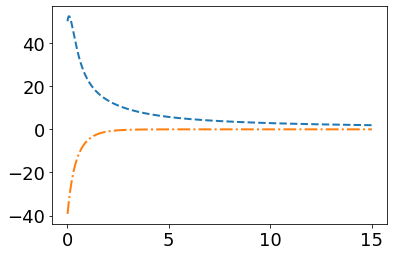

In [26]:
#Hamiltonian,H = Kinetic,T + Potential,U + Uscf
t0 = 1/(2 * dR**2)
T = 2*t0*np.eye(NR) - t0*np.eye(NR,k=1) - t0*np.eye(NR,k=-1)
UN = -2/R # Z=2 for He

# SCF iterations
Uscf = np.zeros(NR)
maxit = 100
tol = 1e-3
iter = 1
Eold = 0
converged = False

while iter < maxit and not converged:
    # "eigh" => eigenvalues W in ascending order & normalized eigenvector
    D,V = LA.eigh(T + np.diag(UN + Uscf)) 
#    print(D.shape)
#    print(D)
    Enew = D[0]; psi = V[:,0]; Ptot = 2*psi*np.conj(psi) # \u\^2 * dR
#    print(sum(Ptot))
    
#    Ptot = 1/2*Ptot # effective (SIC) density
#    Unew = np.cumsum(Ptot)/R + (sum(Ptot/R)-np.cumsum(Ptot/R)) 
    Uh1 = np.cumsum(Ptot)/R
    Uh2 = sum(Ptot/R)-np.cumsum(Ptot/R)
    Uh = Uh1 + Uh2
    Unew = Uh
    P = Ptot
    # local density approxiation (LDA)
##    Ux = - (3/(4*np.pi))**(1/3) * np.where(abs(P)>np.finfo(float).eps,P**(-1/3),0)
    Ux = - (P/(4*np.pi*R*R*dR))**(1/3)
    Unew += Ux

#    change = sum(abs(Unew-Uscf))/NR
    change = abs(Enew - Eold)
    if(change*au2eV < tol): converged = True
    print('iter = %d: E = %.3f eV, change = %.3e ... %s' % (iter, Enew*au2eV, change*au2eV, converged))

    Uscf = 0.8*Unew + 0.2*Uscf
    Eold = Enew
    iter += 1
    
#plt.plot(R*au2ang, P, linewidth=2, linestyle='-', marker='o')
#plt.plot(R*au2ang, Uh1*au2eV, linewidth=2, linestyle='-', marker='o')
#plt.plot(R*au2ang, Uh2*au2eV, linewidth=2, linestyle='-', marker='x')
plt.plot(R*au2ang, Uh*au2eV, linewidth=2, linestyle='--')
plt.plot(R*au2ang, Ux*au2eV, linewidth=2, linestyle='-.')

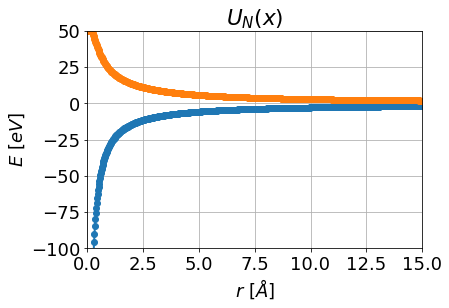

2.0
0.037794517353781455


(0.0, 10.0)

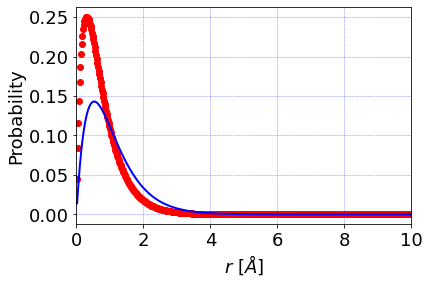

In [30]:
#plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(R*au2ang, UN*au2eV, linewidth=2, linestyle='-', marker='o')
plt.plot(R*au2ang, Uh*au2eV, linewidth=2, linestyle='-', marker='o')
#plt.plot(R*au2ang, Ux*au2eV, linewidth=2, linestyle='-', marker='o')
plt.xlabel('$r \ [\AA]$')
plt.ylabel('$E \ [eV]$')
plt.title('$U_N(x)$')
plt.grid(True)
plt.xlim(0,Rmax*au2ang)
plt.ylim(-100,50)
#tick_params(axis='both',which='major',labelsize=15,direction='in')
#xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
plt.show()

#analytical solutions for 1s hydrogen
P0 = 4*np.exp(-2*R) * R**2 *dR

print(sum(Ptot))
print(sum(P0)*dR)

plt.plot(R*au2ang,np.sqrt(Ptot),'ro',lw=2)
plt.plot(R*au2ang,np.sqrt(P0),'b',lw=2)
plt.xlabel('$r \ [\AA]$')
plt.ylabel('Probability')
plt.grid(color='b', alpha=0.5, ls='--',lw=0.5)
#plt.xlim(0,Rmax*au2ang)
plt.xlim(0,10)
#plt.ylim(0,1)
#tick_params(axis='both',which='major',labelsize=15,direction='in')
#xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
#text(0.1e-9,0.07,'Helium',fontsize=15)
#text(0.15e-9,0.03,'Hydrogen',fontsize=15)

In [30]:
max_iter = 100
E_tol = 1e-3
Uscf = np.zeros(Nx)
iter = 1
change = 1

for iter in range(max_iter):
    [D,V] = LA.eigh(T + np.diag(UN + Uscf))
    DD = np.sort(D)
    ind = np.arange(0,len(T))
    E = D[ind[0]] 
    psi = V[:,ind[0]]
    P = psi*np.conj(psi)
    P = np.transpose(P);
    print(P)
    Unew = (q/(4*np.pi*epsil))*((sum(P/R)-np.cumsum(P/R))+(np.cumsum(P)/R));
    change = sum(abs(Unew-Uscf))/Nx
    print('iter = %d: E = %.3f eV, dq = %.3e' % (iter, E, change))
    Uscf = Unew

      # convergence
    if abs(energy_diff) < energy_tolerance:
        print("converged!")
        break
else:
    print("not converged")
    
plt.plot(R, UN)

NameError: name 'Nx' is not defined